In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [4]:
# Load the datasets
desktop_path = os.path.expanduser("~/Desktop")

# Read CSV files
deliveries_data = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
match_data = pd.read_csv('IPL Matches 2008-2020.csv')

print("Data ready for exploration")
print('Total Matches Played:', match_data.shape[0])
print('\nVenues Played At:', match_data['city'].unique())
print('\nTeams:', match_data['team1'].unique())

# Compute matches played by each team
matches_played_by_teams = pd.concat([match_data['team1'], match_data['team2']], axis=1)
teams = (matches_played_by_teams['team1'].value_counts() + matches_played_by_teams['team2'].value_counts()).reset_index()
teams.columns = ['Team Name', 'Total Matches played']

# Compute total wins
wins = pd.DataFrame(match_data['winner'].value_counts()).reset_index()
wins.columns = ['Team Name', 'Wins']

# Merge into one DataFrame
played = teams.merge(wins, on='Team Name', how='inner')
played['% Win'] = (played['Wins'] / played['Total Matches played']) * 100


Data ready for exploration
Total Matches Played: 816

Venues Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

Teams: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


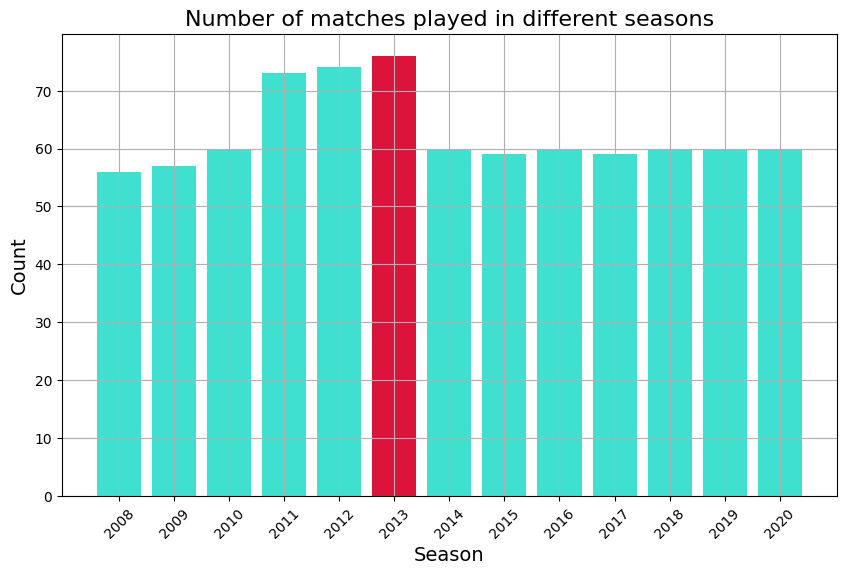

In [6]:
def matches_per_season():
    match_per_season = pd.DataFrame({
        'Season': ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
        'matches': [56, 57, 60, 73, 74, 76, 60, 59, 60, 59, 60, 60, 60]
    })
    colors = ['turquoise'] * len(match_per_season)
    colors[5] = 'crimson'

    plt.figure(figsize=(10, 6))
    plt.bar(match_per_season['Season'], match_per_season['matches'], color=colors)
    plt.title("Number of matches played in different seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
matches_per_season()


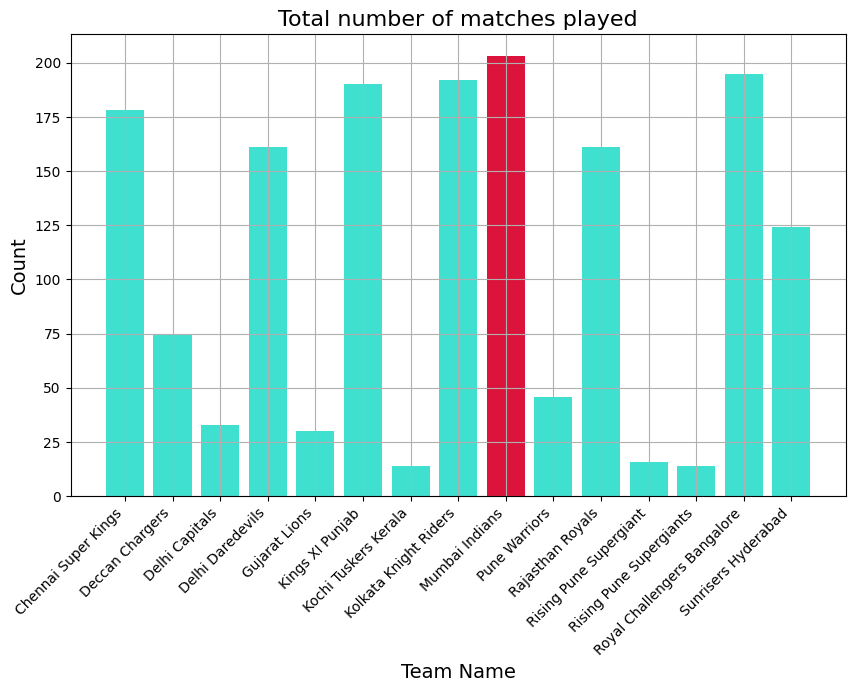

In [7]:
def no_of_matches():
    colors = ['turquoise'] * len(played)
    colors[8] = 'crimson'

    plt.figure(figsize=(10, 6))
    plt.bar(played['Team Name'], played['Total Matches played'], color=colors)
    plt.title("Total number of matches played", fontsize=16)
    plt.xlabel("Team Name", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()
no_of_matches()

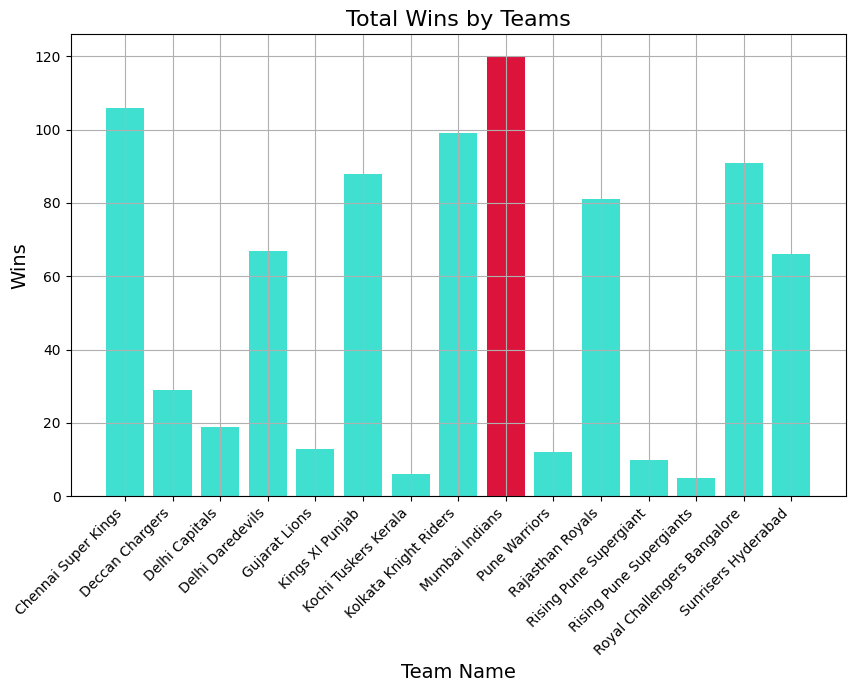

In [8]:
def most_wins():
    colors = ['turquoise'] * len(played)
    colors[8] = 'crimson'

    plt.figure(figsize=(10, 6))
    plt.bar(played['Team Name'], played['Wins'], color=colors)
    plt.title("Total Wins by Teams", fontsize=16)
    plt.xlabel("Team Name", fontsize=14)
    plt.ylabel("Wins", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()
most_wins()

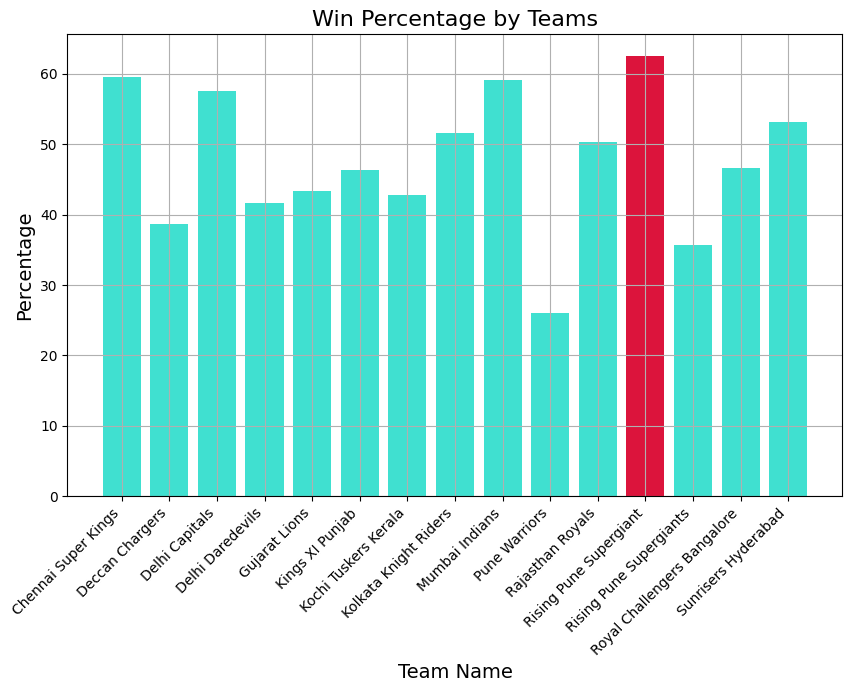

In [9]:
def win_percentage():
    colors = ['turquoise'] * len(played)
    colors[-4] = 'crimson'

    plt.figure(figsize=(10, 6))
    plt.bar(played['Team Name'], played['% Win'], color=colors)
    plt.title("Win Percentage by Teams", fontsize=16)
    plt.xlabel("Team Name", fontsize=14)
    plt.ylabel("Percentage", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()
win_percentage()

Available teams:
1. Chennai Super Kings
2. Deccan Chargers
3. Delhi Capitals
4. Delhi Daredevils
5. Gujarat Lions
6. Kings XI Punjab
7. Kochi Tuskers Kerala
8. Kolkata Knight Riders
9. Mumbai Indians
10. Pune Warriors
11. Rajasthan Royals
12. Rising Pune Supergiant
13. Rising Pune Supergiants
14. Royal Challengers Bangalore
15. Sunrisers Hyderabad
Select the first team (Enter the number): 15
Select the second team (Enter the number): 1


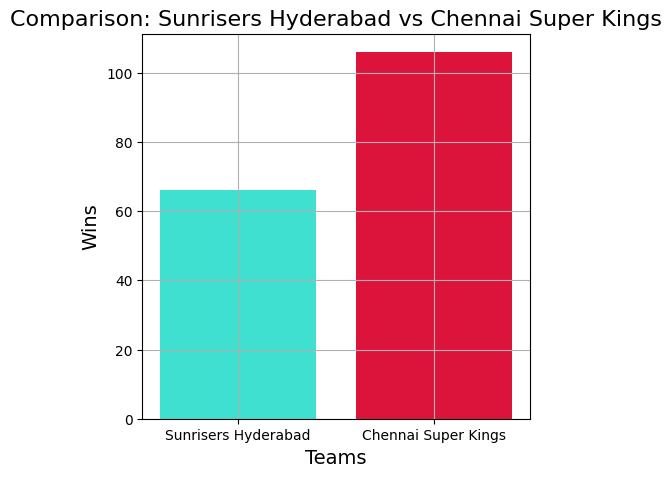

In [10]:
def comparison():
    available_teams = played['Team Name'].tolist()

    print("Available teams:")
    for i, team in enumerate(available_teams, start=1):
        print(f"{i}. {team}")

    team1_index = int(input("Select the first team (Enter the number): ")) - 1
    team2_index = int(input("Select the second team (Enter the number): ")) - 1

    team1, team2 = available_teams[team1_index], available_teams[team2_index]
    team_wins = played.set_index('Team Name')['Wins']

    all_teams_wins = np.array([team_wins.loc[team1], team_wins.loc[team2]])

    plt.figure(figsize=(5, 5))
    plt.bar([team1, team2], all_teams_wins, color=['turquoise', 'crimson'])
    plt.title(f"Comparison: {team1} vs {team2}", fontsize=16)
    plt.xlabel("Teams", fontsize=14)
    plt.ylabel("Wins", fontsize=14)
    plt.grid(True)
    plt.show()
comparison()

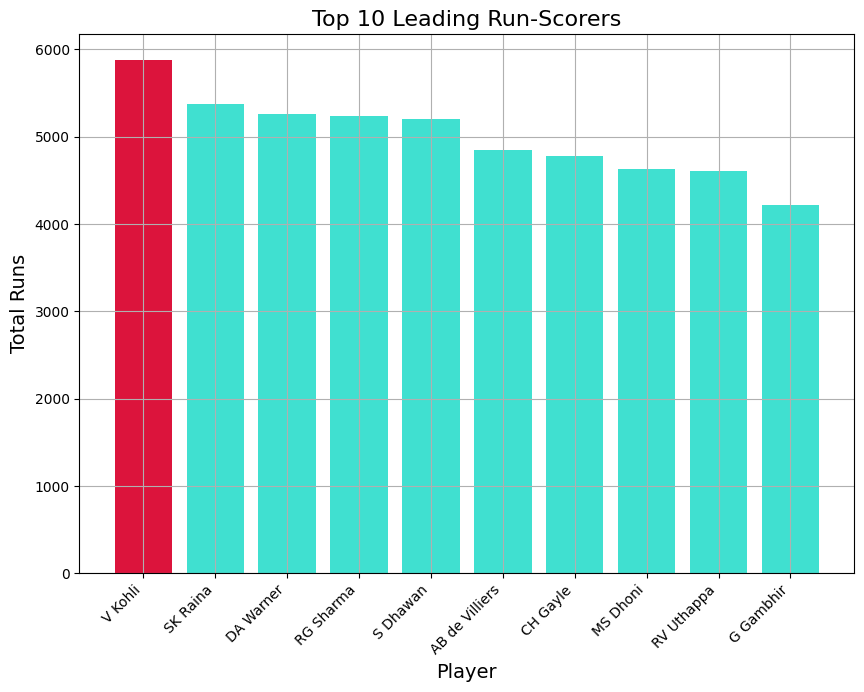

In [11]:
def most_runs():
    runs = deliveries_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
    runs.columns = ['Batsman', 'Runs']
    top_batsmen = runs.sort_values(by='Runs', ascending=False).head(10)

    colors = ['turquoise'] * 10
    colors[0] = 'crimson'

    plt.figure(figsize=(10, 7))
    plt.bar(top_batsmen['Batsman'], top_batsmen['Runs'], color=colors)
    plt.title("Top 10 Leading Run-Scorers", fontsize=16)
    plt.xlabel("Player", fontsize=14)
    plt.ylabel("Total Runs", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()
most_runs()

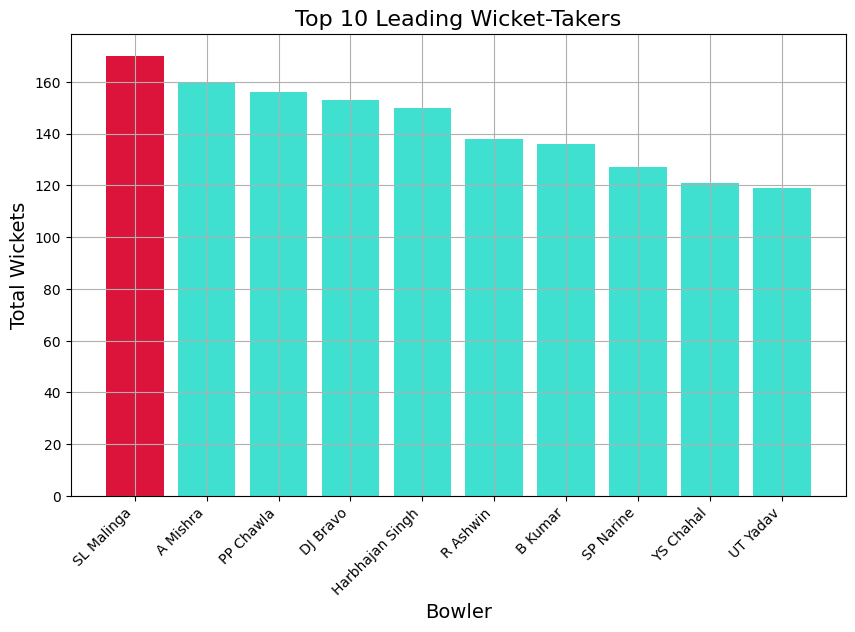

In [12]:
def most_wickets():
    dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']
    filtered_data = deliveries_data[deliveries_data["dismissal_kind"].isin(dismissal_kinds)]

    wicket_counts = filtered_data['bowler'].value_counts().head(10)

    colors = ['turquoise'] * 10
    colors[0] = 'crimson'

    plt.figure(figsize=(10, 6))
    plt.bar(wicket_counts.index, wicket_counts.values, color=colors)
    plt.title("Top 10 Leading Wicket-Takers", fontsize=16)
    plt.xlabel("Bowler", fontsize=14)
    plt.ylabel("Total Wickets", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()
most_wickets()